In [39]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#ex) : 데이터의 편향을 크게 잡아서 예측과 평가를 해보자
# survived = 1 의 수를 5% 줄인 결과를 예측해 보자
# 편향이 있는 데이터의 경우 일반데이터에 비해 정답률이 ROC곡선 보다 PR이 활성화 된다.

In [40]:
#1단계) 전처리 하자
df = sns.load_dataset('titanic')
df.head()

drop_list = ["deck","alive"]
df = df.drop(drop_list, axis = 1)
df = df.dropna()

In [41]:
#2단계) survived =  1 의 변수를 제거하고 그 중에서 5% 무작위로 샘플링하자
res = df[df["survived"]== 1]
res = res.sample(frac = 0.05, random_state = 0)

In [42]:
#3단계) res 데이터에 데이터세트에서 추출한 사망자의 데이터를 결합하자
res02 = df[df["survived"]== 0]
df = pd.concat([res,res02])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
209,1,1,male,40.0,0,0,31.0000,C,First,man,True,Cherbourg,True
569,1,3,male,32.0,0,0,7.8542,S,Third,man,True,Southampton,True
315,1,3,female,26.0,0,0,7.8542,S,Third,woman,False,Southampton,True
641,1,1,female,24.0,0,0,69.3000,C,First,woman,False,Cherbourg,True
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True


In [43]:
#4단계) 더미변수
X = pd.get_dummies(df.drop("survived",axis=1))
Y = df["survived"]
# 대상 데이터 확인
pd.Series.value_counts(Y)  #사망자 424 생존자 7명

0    424
1     14
Name: survived, dtype: int64

In [44]:
#5단계 : 머신러닝을 구현하자
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.5, random_state = 0)
ir = LogisticRegression(max_iter=1000, random_state = 0) # 1000번을 반복해서 판정을 한다.
ir.fit(X_train,Y_train)  # 학습을 한다

#4단계 학습 데이터 판정 결과(예측)를 test 데이터로 확인 하자
y_pred = ir.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
print('confusion_matrix = ',confusion_matrix(Y_test,y_pred))
print('accuracy = ', accuracy_score(Y_test,y_pred))
print('precision = ', precision_score(Y_test,y_pred))
print('recall = ',recall_score(Y_test,y_pred))
print('f1 score = ',f1_score(Y_test,y_pred))

confusion_matrix =  [[211   0]
 [  7   1]]
accuracy =  0.9680365296803652
precision =  1.0
recall =  0.125
f1 score =  0.2222222222222222


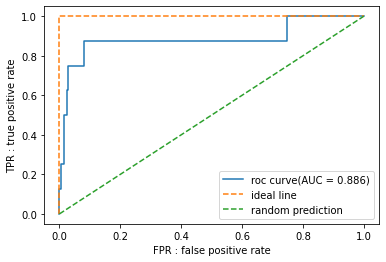

In [46]:
# 번외 3) plot 해보자
Y_score = ir.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

plt.plot(fpr,tpr,label = 'roc curve(AUC = %.3f)'% auc(fpr,tpr))
plt.plot([0,0,1],[0,1,1], linestyle = '--', label = 'ideal line')
plt.plot([0,1],[0,1], linestyle = '--', label = 'random prediction')
plt.legend()
plt.xlabel('FPR : false positive rate')
plt.ylabel('TPR : true positive rate')
plt.show()

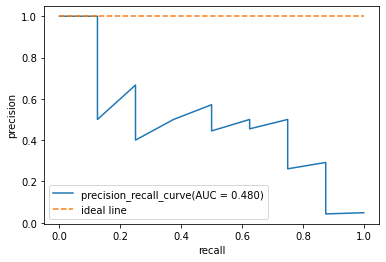

In [47]:
#번외 4)  PR 곡선
probas_pred = ir.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas_pred)
 
plt.plot(recall,precision,label = 'precision_recall_curve(AUC = %.3f)'% auc(recall,precision))
plt.plot([0,1],[1,1], linestyle = '--', label = 'ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()